### Text Classification with ScikitLearn,SpaCy and Interpretation of ML Model with ELi5
   + Text Preprocessing with SpaCy
   + Classifying Text With Sklearn
   + Interpreting Model with Eli5
    

In [389]:
# load EDA Pkgs
import pandas as pd
import numpy as np
# Load libraries
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import KFold
import pandas
from sklearn.model_selection import train_test_split
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [390]:
# Load NLP pkgs
import spacy

In [391]:
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [392]:
# Use the punctuations of string module
import string
punctuations = string.punctuation

In [393]:
# Creating a Spacy Parser
from spacy.lang.en import English
parser = English()

In [249]:
# Build a list of stopwords to use to filter
stopwords = list(STOP_WORDS)

In [250]:
print(stopwords)

['except', 'hundred', 'never', 'did', 'down', 'upon', 'might', 'can', 'neither', 'in', 'per', 'this', 'always', 'those', 'whither', 'still', 'fifty', 'thus', 'them', 'before', 'seeming', 'serious', 'is', 'or', 'many', 'below', 'two', 'anyway', 'however', 'thru', 'anywhere', 'amount', 'toward', 'became', 'no', 'thereafter', 'quite', 'whereupon', 'me', 'show', 'not', 'nine', 'beyond', 'six', 'thereupon', 'being', 'less', 'see', 'the', 'therein', 'each', 'are', 'has', 'using', 'whereafter', 'with', 'few', 'others', '‘d', 'everything', 'our', 'front', 'anything', 'against', 'at', 'becomes', 'itself', 'hereupon', 'on', 'former', 'seem', '’ll', 'whereas', 'bottom', 'off', 'everywhere', 'call', 'next', 'first', 'for', 'third', '’s', 'even', 'together', 'mine', 'by', 'most', 'take', 'four', '‘ve', 'since', 'then', 'about', 'someone', 'all', 'out', 'be', 'your', 'though', 'to', 'yet', 'whose', 'why', 'become', 'regarding', 'that', 'myself', 'he', 'full', 'across', 'top', '’re', 'an', 'ca', 'own

In [251]:
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

In [252]:
ex1 = "He was walking with the walker in the Wall he may had sat and run with the runner"

In [511]:
spacy_tokenizer(ex1)

['walking', 'walker', 'wall', 'sat', 'run', 'runner']

In [394]:
# Load ML Pkgs
# ML Packages
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [395]:
# Load Interpretation Pkgs
import eli5

In [396]:
# Load dataset
df = pd.read_csv("newhateegs.csv")

In [397]:
df.head()

,Message,Target
0,Violent Buddhist extremists are targeting Musl...,1
1,"Sorry Buddhists, Your Religion Sucks Too.",1
2,"The Quran: A book that incites genocide, war, ...",1
3,the only people involved in Islam are prisoner...,1
4,Islam out of Britain – Protect the British Peo...,1


In [398]:
df.shape

(354, 2)

In [430]:
models = []
models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names=[]

In [431]:
df.columns

Index(['Message', 'Target'], dtype='object')

In [432]:
#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

In [433]:
# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [434]:
# Vectorization
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1)) 
# classifier = LinearSVC()
classifier = SVC(C=10, gamma=0.01, probability=True)

In [435]:
# Using Tfidf
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [436]:
# Splitting Data Set
from sklearn.model_selection import train_test_split

In [437]:
# Features and Labels
X = df['Message']
ylabels = df['Target']

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3, random_state=42)

In [454]:
X_train

vectorizer_1 = CountVectorizer()
X_1 = vectorizer_1.fit_transform(X_train)
X_2=vectorizer_1.fit_transform(X_test)

In [447]:
X_train.shape

(247,)

In [466]:
# Create the  pipeline to clean, tokenize, vectorize, and classify 
for name, model in models:
    pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier',model)])
    pipe.fit(X_train,y_train)  
    print("Accuracy Score:",pipe.score(X_test, y_test),model)
# #     kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
# #     cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='accuracy')
#     results.append(pipe.score(X_test, y_test))
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)


Accuracy Score: 0.7850467289719626 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy Score: 0.616822429906542 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Accuracy Score: 0.6542056074766355 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Accuracy Score: 0.616822429906542 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='

In [449]:
# Fit our data
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7f9766299080>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ng...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [485]:
clf = SVC(C=10,gamma=0.1)
pipesvc = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier',clf)])
pipesvc.fit(X_train,y_train)
svmpredicted=pipesvc.predict(X_test)

print('Training Score:',pipesvc.score(X_train, y_train))
print('Testing Score:',pipesvc.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,svmpredicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,svmpredicted))

Training Score: 0.9878542510121457
Testing Score: 0.7383177570093458
Accuracy: 0.7383177570093458
Confusion Matrix: 
 [[18 23]
 [ 5 61]]


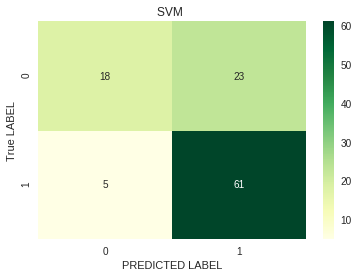

In [471]:
sns.heatmap(confusion_matrix(y_test,svmpredicted),annot=True,cmap='YlGn')
plt.title("SVM ")
plt.ylabel("True LABEL")
plt.xlabel("PREDICTED LABEL")
plt.show()

In [487]:
kkk=KNeighborsClassifier()
pipeneighnour = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier',kkk)])
pipeneighnour.fit(X_train,y_train)
# kkk.fit(X_train,Y_train)
p=pipeneighnour.predict(X_test)
print('Training Score:',pipeneighnour.score(X_train, y_train))
print('Testing Score:',pipeneighnour.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,p))
print('Confusion Matrix: \n', confusion_matrix(y_test,p))


Training Score: 0.7692307692307693
Testing Score: 0.616822429906542
Accuracy: 0.616822429906542
Confusion Matrix: 
 [[19 22]
 [19 47]]


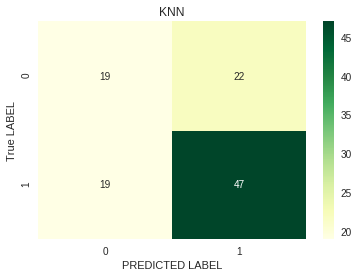

In [488]:
sns.heatmap(confusion_matrix(y_test,p),annot=True,cmap='YlGn')
plt.title("KNN")
plt.ylabel("True LABEL")
plt.xlabel("PREDICTED LABEL")
plt.show()

In [489]:
logistic=LogisticRegression()
pipelog = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier',logistic)])
pipelog.fit(X_train,y_train)
# kkk.fit(X_train,Y_train)
# p=pipe.predict(X_test)
logispredicted=pipelog.predict(X_test)
print('Training Score:',pipelog.score(X_train, y_train))
print('Testing Score:',pipelog.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,logispredicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,logispredicted))

Training Score: 0.979757085020243
Testing Score: 0.7850467289719626
Accuracy: 0.7850467289719626
Confusion Matrix: 
 [[22 19]
 [ 4 62]]


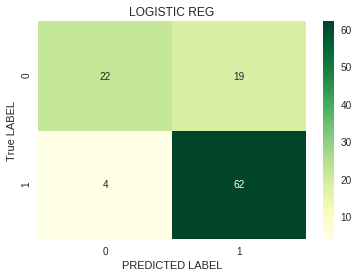

In [490]:
sns.heatmap(confusion_matrix(y_test,logispredicted),annot=True,cmap='YlGn')
plt.title("LOGISTIC REG")
plt.ylabel("True LABEL")
plt.xlabel("PREDICTED LABEL")
plt.show()

In [492]:
randomforest = RandomForestClassifier(n_estimators=100)
# randomforest.fit(X_train, y_train)
#Predict Output
piperandom = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier',randomforest)])
piperandom.fit(X_train,y_train)
predicted = piperandom.predict(X_test)

print('Training Score:',piperandom.score(X_train, y_train))
print('Testing Score:',piperandom.score(X_test, y_test))
print('Accuracy:',accuracy_score(y_test,predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,predicted))


Training Score: 0.9878542510121457
Testing Score: 0.6822429906542056
Accuracy: 0.6822429906542056
Confusion Matrix: 
 [[10 31]
 [ 3 63]]


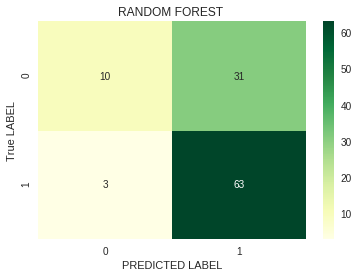

In [493]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,cmap='YlGn')
plt.title("RANDOM FOREST ")
plt.ylabel("True LABEL")
plt.xlabel("PREDICTED LABEL")
plt.show()

In [494]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'SVM','Random Forest','KNN'],
    'Score': [ pipelog.score(X_train, y_train), pipesvc.score(X_train, y_train), piperandom.score(X_train, y_train),pipeneighnour.score(X_train, y_train)],
    'Test Score': [ pipelog.score(X_test, y_test), pipesvc.score(X_test, y_test), piperandom.score(X_test, y_test),pipeneighnour.score(X_test, y_test)]})
models.sort_values(by='Test Score', ascending=False)


,Model,Score,Test Score
0,Logistic Regression,0.979757,0.785047
1,SVM,0.987854,0.738318
2,Random Forest,0.987854,0.682243
3,KNN,0.769231,0.616822


In [347]:
X_test.shape

(107,)

In [348]:
X_test.values[1]

"Appallachian Whites are poorer than negroes and they don't chimp out."

In [495]:
# Predicting with a test dataset

pipelog.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [497]:
print("Accuracy Score:",pipelog.score(X_test, y_test))

Accuracy Score: 0.7850467289719626


In [498]:
# Prediction Results
# 1 = Positive review
# 0 = Negative review
for (sample,pred) in zip(X_test,sample_prediction):
    print(sample,"Prediction=>",pred)

This hole in the wall has great Mexican street tacos, and friendly staff. Prediction=> 0
Appallachian Whites are poorer than negroes and they don't chimp out. Prediction=> 1
Charles Darwin's personal pet tortoise didn't die until recently. Prediction=> 1
 I am going to teach my children to not to associate with transgenders because if you lay down with dogs you get with fleeps. Prediction=> 0
You black slave, pick up the cotton. Prediction=> 0
We Chinese people are brave and industrious. Prediction=> 0
They have been announcing on the microphone that if the Hindus leave their house, they shall kill them. Prediction=> 1
You will be a slave forever, you nigger. Prediction=> 0
I hope you get epilepsy. Prediction=> 1
For I conclude that the enemy is not lipstick, but guilt itself; we deserve lipstick, if we want it, AND free speech; we deserve to be sexual AND serious or whatever we please.  Prediction=> 0
Kill Palestinians to get closer to God. Prediction=> 0
Muslims are terrorists, they 

### Interpreting Our Model
+ Eli5
+ Data
+ Model
+ Target Names
+ Function

In [499]:
from eli5.lime import TextExplainer

In [500]:
pipe.predict_proba

<function sklearn.pipeline.Pipeline.predict_proba(self, X)>

In [501]:
exp = TextExplainer(random_state=42)

In [502]:
X_test.values[0]

'This hole in the wall has great Mexican street tacos, and friendly staff.'

In [515]:
a=pipelog.predict([input()])
if  a==1:
    print("hate statement")
elif a == 0:
    print("Not hate bro!")

akshay
hate statement


In [374]:
exp.fit(X_test.values[0], pipe.predict_proba)

TextExplainer(char_based=False,
       clf=SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='elasticnet', power_t=0.5,
       random_state=<mtrand.RandomState object at 0x7f9748c2d750>,
       shuffle=True, verbose=0, warm_start=False),
       expand_factor=10, n_samples=5000, position_dependent=False,
       random_state=42, rbf_sigma=None,
       sampler=MaskingTextSamplers(random_state=<mtrand.RandomState object at 0x7f9748c2d750>,
          sampler_params=None, token_pattern='(?u)\\b\\w+\\b',
          weights=array([0.7, 0.3])),
       token_pattern='(?u)\\b\\w+\\b',
       vec=CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, 

In [378]:
ylabels.unique()

array([1, 0])

In [379]:
target_names = ['Negative','Positive']

In [380]:
exp.show_prediction()

In [381]:
exp.show_prediction(target_names=target_names)

In [382]:
exp.metrics_

{'mean_KL_divergence': 0.0030388858944499645, 'score': 0.9928952335378111}

- ‘score’ is an accuracy score weighted by cosine distance between generated sample and the original document (i.e. texts which are closer to the example are more important). Accuracy shows how good are ‘top 1’ predictions.
- ‘mean_KL_divergence’ is a mean Kullback–Leibler divergence for all target classes; it is also weighted by distance. KL divergence shows how well are probabilities approximated; 0.0 means a perfect match.

In [46]:
exp.show_weights()

Weight?,Feature
+0.688,<BIAS>
+0.316,hopeless
+0.272,poor
+0.250,is
+0.206,a
+0.199,and
-0.071,poor and
-0.144,a poor
-0.187,is a
-0.221,india is


In [47]:
# Check For Vectorizer Used
exp.vec_

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w+\\b', tokenizer=None,
        vocabulary=None)

In [48]:
# Check For Classifer Used
exp.clf_

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='elasticnet', power_t=0.5,
       random_state=<mtrand.RandomState object at 0x7f9749415c60>,
       shuffle=True, verbose=0, warm_start=False)